# <center>GESTÃO DE RELACIONAMENTO COM CLIENTE (CRM)</center>

<img src='https://blog.multiedro.com.br/wp-content/uploads/2018/07/207884-como-usar-o-crm-na-gestao-de-relacionamento-com-o-cliente.jpg' width=400 heigth=400>

## 1 - Introdução

### 1.1 Mas o que é isso?

<p>Gestão de relacionamento com o cliente é uma estratégia de negócios para qualquer empresa que busca melhorar as receitas e a lucratividade, além de reduzir custos e aumentar a fidelidade do cliente.</p>

<p>Quando bem implementado, a getão de relacionamento com o cliente oferece às empresas não apenas uma visão das oportunidades de crescimento de negócios com cada cliente, mas também, uma maneira de medir seu valor dentro da jornada do consumidor.</p>

<p>Uma forma prática de calcular essa relação com o cliente, é através de pontuações. Ferramentas que produzem pontuações permitem projetar informações quantificáveis em uma dada população. As pontuações  são então usadas pelo sistema de informação, por exemplo, para personalizar o relacionamento com o consumidor.</p>

### 1.2 Objetivo

<p>Em 2009, a conferência <b>Knowledge Discovery and Data Mining (KDD)</b> lançou um desafio envolvendo <code>Machine Learning</code>. Dados de consumidores foram disponibilizados da empresa de telecomunicações francesa <i>Orange</i>.</p>

<p>O <code>Dataset</code> fornecido tem 50000 instâncias e 230 variáveis, as 190 primeiras são numéricas e as 40 restantes, categóricas. O objetivo é prover um modelo que seja capaz de prever <b>três comportamentos do consumidor.</b></p>

<p>
    As variáveis de saída do modelo são:
        <ul><code>CHURN</code>: Prever o risco do cliente fazer o cancelamento.</ul>
        <ul><code>APPETENCY</code>: A tendência do cliente de comprar novos produtos e serviços</ul>
        <ul><code>UPSELLING</code>: Propensão para comprar upgrades ou adicionais com maior margem de lucro quando apresentados.</ul>
</p>    

<p> 
    Neste <i>Notebook</i>, iremos fazer os tratamentos das variáveis, e gerar os <code>datasets</code>, que iremos utilizar para desenvolver nossos modelos. Ou seja, no final deste <i>Notebook</i>, terão 3 <code>datasets</code>, um para cada previsão que será feita.
</p>

 ### 1.3 Entendendo os dados e um breve resumo da GDPR

<p>
    Como foi citado, existem 230 variáveis no dataset, porém não temos conhecimento algum do valor dos seus dados, já que eles são mascarados, para proteger os dados dos clientes da empresa <i>Orange</i>.
</p>

<p>
    Os dados são protegidos por uma lei, chamada GDPR é uma sigla em inglês que significa General Data Protection Regulation. Ou, em português, Regulamentação Geral de Proteção de Dados. Ela foi aprovada pela União Européia em 2016 e passou a valer oficialmente em 2018.
</p>

<p>
    No Brasil temos a, Lei Geral de Proteção de Dados Pessoais (LGPD), que pode ser considera a resposta a GDPR.
</p>

<p>
    Todo o trabalho feito na base de dados, será considerado a natureza dos dados, e não o valor da própria variável.
</p>

<img src='https://files.tecnoblog.net/wp-content/uploads/2018/04/gdpr.jpg' width=400 heigth=400>

______________________________________
--------------------------------------

## 2 - Bibliotecas e Datasets

### 2.1 Importando as bibliotecas

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Seleção de variáveis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#### Settings ####
pd.options.display.float_format = "{:,.3f}".format
plt.style.use("classic")
# plt.rcParams("figure.figsize") = [10,5]
%load_ext nb_black

<IPython.core.display.Javascript object>

### 2.2 Carregando os datasets

In [2]:
features_train = pd.read_csv("orange_small_train.data", sep="\t", na_filter=False)

churn = pd.read_csv("orange_small_train_churn.labels", header=None)
appentency = pd.read_csv("orange_small_train_appetency.labels", header=None)
upselling = pd.read_csv("orange_small_train_upselling.labels", header=None)

<IPython.core.display.Javascript object>

In [3]:
features_train.shape

(50000, 230)

<IPython.core.display.Javascript object>

#### Visualizando as 5 primeiras linhas do dataset.

In [4]:
features_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1526,7,,,,...,oslk,fXVEsaq,jySVZNlOJy,,,xb3V,RAYp,F2FyR07IdsN7I,,
1,,,,,,525,0,,,,...,oslk,2Kb5FSF,LM8l689qOp,,,fKCe,RAYp,F2FyR07IdsN7I,,
2,,,,,,5236,7,,,,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,
3,,,,,,,0,,,,...,oslk,CE7uk3u,LM8l689qOp,,,FSa2,RAYp,F2FyR07IdsN7I,,
4,,,,,,1029,7,,,,...,oslk,1J2cvxe,LM8l689qOp,,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,


<IPython.core.display.Javascript object>

------------------------------------------------------------

##### Observações:
<p>
    Podemos notar visualizando os datasets(treino e teste), que os dados não fazem sentido. E os valores ausentes estão marcados com <code>""</code> -> Valores Vazios, em vez de <code>NaN</code> -> Valores Nulos.
</p>

---------------------------------------------------------

### 2.3 Transformando valores vazios em nulos.

<p>
    Para garantir a consistência das variáveis e facilitar no tratamento das mesmas, iremos realizar a transformação com o método <code><b>replace</b></code> da biblioteca <b>pandas</b>.
</p>

In [5]:
features_train = features_train.replace("", np.NaN)

<IPython.core.display.Javascript object>

#### Visualizando a primeira linha do Dataset)

In [6]:
features_train.head(1)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN


<IPython.core.display.Javascript object>

_________________________________________________

### 2.4 Divisão das variáveis categóricas e numéricas

<p>
    Como já foi falado, as 190 primeiras variáveis são númericas e o restante delas são categóricas.
</p>

In [7]:
all_vars = features_train.columns

num_vars = np.array(all_vars[:190])
cat_vars = np.array(all_vars[190:])

<IPython.core.display.Javascript object>

#### 2.4.1 Garantindo que os valores estão em seu tipo correto

In [8]:
for col in num_vars:
    features_train[col] = features_train[col].astype("float")

<IPython.core.display.Javascript object>

In [9]:
for col in cat_vars:
    features_train[col] = features_train[col].astype("category")

<IPython.core.display.Javascript object>

In [10]:
num_vars[0], num_vars[-1]

('Var1', 'Var190')

<IPython.core.display.Javascript object>

In [11]:
cat_vars[0], cat_vars[-1]

('Var191', 'Var230')

<IPython.core.display.Javascript object>

---------------------------------------------------------
------------------------------------------------------

## 3 - Tratamento do Dataset 

<p>
   Agora iremos iniciar o tratamento do Dataset, para garantir a consistência dos dados.
</p>

### 3.1 Trabalhando com os valores nulos

<p>
    Não podemos adivinhar o que cada variável traz de valor, e variáveis com grandes quantidades de valores faltantes, ou nulos, serão excluídas por falta de informação. Já que não é possível utilizar técnicas para que sejam preenchidas, como seria o caso de aplicar a média ou mediana para variáveis numéricas.
</p>

In [12]:
# Criando uma lista com valores nulos por coluna
empty_values_by_columns = features_train.isna().sum()

<IPython.core.display.Javascript object>

In [13]:
empty_values_by_columns

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

<IPython.core.display.Javascript object>

### 3.2 Visualizando os valores nulos por coluna

Text(0, 0.5, '')

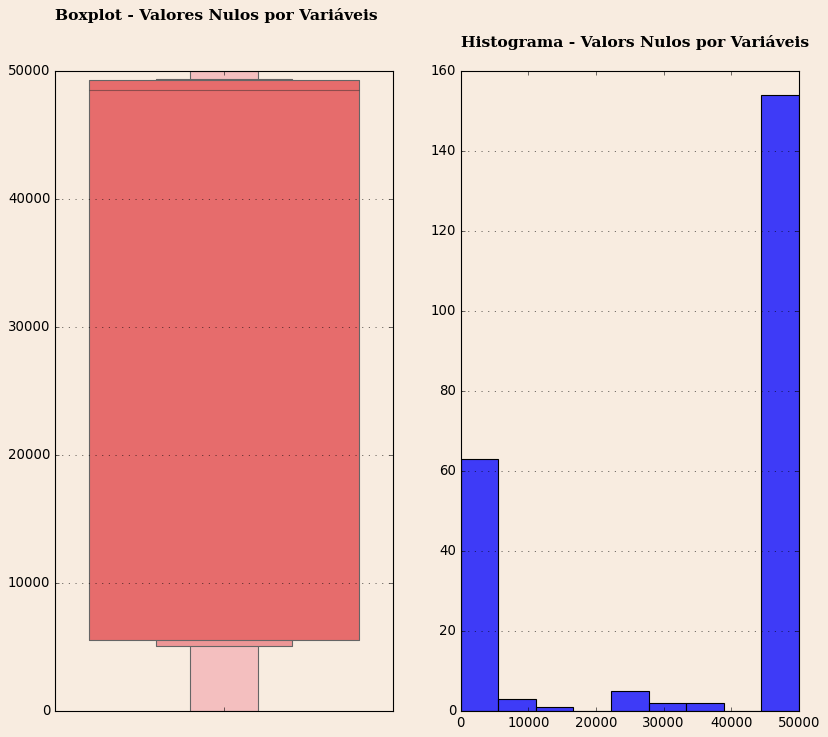

<IPython.core.display.Javascript object>

In [14]:
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = '#F8ECE0'
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.text(-0.5, 54000, 'Boxplot - Valores Nulos por Variáveis', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0, y=empty_values_by_columns, palette=['#FA5858'])
ax0.set_xlabel('')
ax0.set_xlabel('')

ax1.text(0, 166, 'Histograma - Valors Nulos por Variáveis', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1, x=empty_values_by_columns,palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")


#### Insights :

<p>
    Pelo gráfico do BoxPlot, é nítido que está desbalanceado, já que a mediana está próxima dos 50.000, é no Histograma podemos visualizar que existem algumas variáveis com até 10.000 e  um pouco mais de 20.000.
</p>

<p>
    Irei selecionar as variáveis através de um cálculo com um threshold de 0,25. O resto será deletado, como não sabemos a origem, preencher os dados com a alguma medida descritiva seria um equívoco.
</p>

#### 3.2.1 Mediana

In [15]:
print(
    f"Valor da mediana dos Valores Nulos por Variável: {empty_values_by_columns.median()}"
)

Valor da mediana dos Valores Nulos por Variável: 48513.0


<IPython.core.display.Javascript object>

#### 3.2.2 Definindo o threshold e selecionando as variáveis

In [16]:
num_rows = len(features_train)
threshold = 0.25
num_th = num_rows * threshold
print(f"o limite de valores nulos será de {num_th}")

o limite de valores nulos será de 12500.0


<IPython.core.display.Javascript object>

-------------------------------------------

<p>
    Agora é aplicar um filtro para manter as variáveis que tem 12.500 ou menos valores nulos.
</p>

In [17]:
keep_vars = np.array(all_vars[(empty_values_by_columns <= num_th)])

<IPython.core.display.Javascript object>

In [18]:
print(f"Antes do filtro: {len(all_vars)} variáveis")
print("------------------------------")
print(f"Após do filtro:  {len(keep_vars)}  variáveis")

Antes do filtro: 230 variáveis
------------------------------
Após do filtro:  66  variáveis


<IPython.core.display.Javascript object>

### 3.3 Atualizando a lista de variáveis categóricas e numéricas

In [19]:
num_vars = [i for i in num_vars if i in keep_vars]
cat_vars = [i for i in cat_vars if i in keep_vars]

<IPython.core.display.Javascript object>

In [20]:
len(num_vars), len(cat_vars)

(38, 28)

<IPython.core.display.Javascript object>

-----------------------------------

### 3.4 Preenchendo os valores nulos que sobraram 

<p>
    Com a diminuição dos valores nulos, podemos aplicar algumas técnicas com mais confiança. Para as númericas utilizaremos o preenchimento com a <b>média</b>, e as categóricas irão ganhar uma nova categoria <i>'missing'</i>
<p>

In [21]:
# Variáveis númericas
for col in num_vars:
    col_mean = features_train[col].mean()
    features_train[col] = features_train[col].fillna(col_mean)

<IPython.core.display.Javascript object>

In [22]:
# Variáveis categóricas
for col in cat_vars:
    features_train[col] = features_train[col].cat.add_categories("missing")
    features_train[col] = features_train[col].fillna("missing")

<IPython.core.display.Javascript object>

-----------------------------------------

### 3.5 Verificando a quantidade de categorias de cada variável

In [23]:
n_categories = features_train[cat_vars].apply(lambda x: len(set(x)))

<IPython.core.display.Javascript object>

<p>
    Visualizando a quantidade de categorias por variável.
</p>

Text(0.5, 1.0, 'Número de Categoria por Variável')

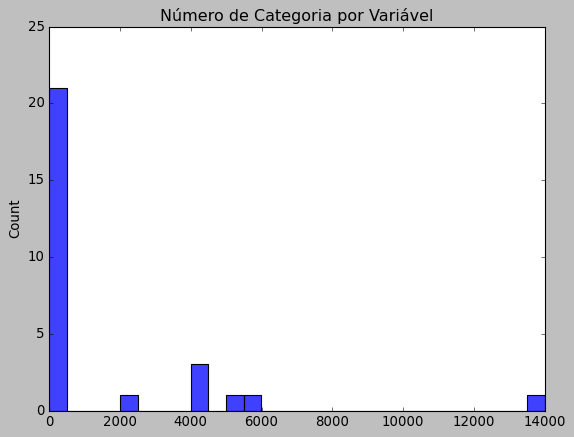

<IPython.core.display.Javascript object>

In [24]:
sns.histplot(n_categories)
plt.title("Número de Categoria por Variável")

#### Observações:
<p>
    Existem algumas variáveis com um número expressivo de categorias, o que não vai refletir    informações relevantes no modelo. Podemos observar pelo gráfico, das 28 variáveis, um pouco mais de 20 se encontram com menos de 2000 categorias, e nesse ponto limitaremos um corte.
</p>

In [25]:
cat_vars = np.array(n_categories[n_categories < 2000].index)

<IPython.core.display.Javascript object>

In [26]:
print(f"Número de variáveis restantes: {len(cat_vars)}")

Número de variáveis restantes: 21


<IPython.core.display.Javascript object>

## 4. Seleção de Variáveis

<p>
    Primeiro iremos juntar as variáveis categóricas e numéricas, após realizar o procedimento realizaremos a transformação das variáveis categóricas em dummies para a modelagem. 
</p>

In [27]:
# features_train
features_train = features_train[list(num_vars) + list(cat_vars)]
print(features_train.shape)
features_train.head()

(50000, 59)


,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,"1,526.000",7.000,184.000,464.000,580.000,14.000,128.000,166.560,0.000,"3,570.000",...,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000,0.000,0.000,168.000,210.000,2.000,24.000,353.520,0.000,"4,764,966.000",...,uKAI,L84s,NhsEn4L,missing,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,"5,236.000",7.000,904.000,"1,212.000","1,515.000",26.000,816.000,220.080,0.000,"5,883,894.000",...,uKAI,L84s,UbxQ8lZ,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,"1,326.437",0.000,0.000,234.518,0.000,4.508,0.000,22.080,0.000,0.000,...,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,"1,029.000",7.000,"3,216.000",64.000,80.000,4.000,64.000,200.000,0.000,0.000,...,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


<IPython.core.display.Javascript object>

In [28]:
# features_train
features_train = pd.get_dummies(features_train)
features_train.shape

(50000, 1052)

<IPython.core.display.Javascript object>

---------------------------------

### 4.1 Extra Trees Classifier

<p>
    Utilizaremos o modelo Extra Trees Classifier, ele não é muito comentado, mas tem um bom desempenho com a seleção de variáveis.
</p>
<p>
    Existem variáveis que iremos fazer a previsão, cada variável terá suas variáveis mais importantes, começaremos pelo <code><b>CHURN</b></code>:
</p>

In [29]:
# Função para receber as variáveis e sua importância.
def var_importances(features, outcome):
    model = ExtraTreesClassifier(n_estimators=200, criterion="entropy", verbose=0)
    model.fit(features, np.array(outcome).ravel())

    importances = model.feature_importances_
    variables = np.array(features.columns)
    indices = np.argsort(importances)[::-1]
    importances = importances[indices]
    variables = variables[indices]

    return variables, importances

<IPython.core.display.Javascript object>

### 4.1.1 Churn

In [30]:
variables, importances = var_importances(features_train, churn)

<IPython.core.display.Javascript object>

In [31]:
df_importances = pd.DataFrame({"variables": variables, "importances": importances})
df_importances

,variables,importances
0,Var57,0.018
1,Var73,0.018
2,Var113,0.017
3,Var81,0.014
4,Var153,0.014
...,...,...
1047,Var212_missing,0.000
1048,Var193_QG5U1Qs9mF3805lxYz2cGPnrm,0.000
1049,Var193_KjAW4rq3iyvu8XwKkyQ2_svIATjM3B5,0.000
1050,Var204_missing,0.000


<IPython.core.display.Javascript object>

------------------------------------------------------

<p>
    O dataset está da variável de maior importância, para a de menor importância, podemos notar que pelos últimos valores que não representam a menor significância para o modelo. E o total da soma das importâncias, resultará no valor 1.0. Por isso faremos um corte das variáveis que não trazem significância. 
<p>

#### 4.1.2 Visualizando a importância das variáveis

In [32]:
def sum_and_plot(variables, importances):
    var = []
    imp_sum = []
    for i in range(len(importances)):
        sum_importances = importances[: (i + 1)].sum()
        var.append(variables[i])
        imp_sum.append(sum_importances)
    sum_importances = pd.DataFrame({"var": var, "sum_importances": imp_sum})
    plt.scatter(sum_importances.index, sum_importances.iloc[:, 1])
    return sum_importances

<IPython.core.display.Javascript object>

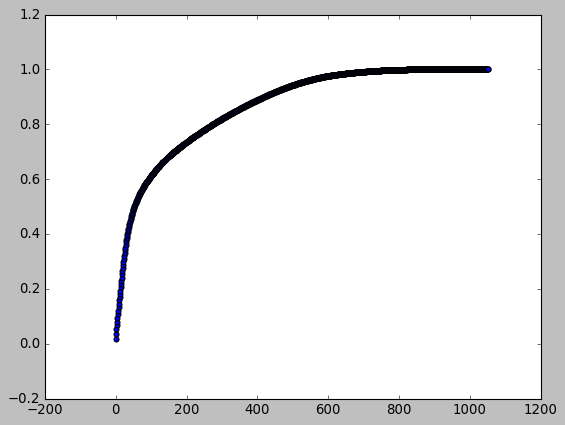

<IPython.core.display.Javascript object>

In [33]:
sum_importances = sum_and_plot(variables, importances)

#### Observações:

<p>
    Pelo gráfico a reta, ele atinge um valor próximo de 1, perto das 700 variáveis, iremos utilizar as variáveis que somam 0.99 e retirar o resto.
</p>

#### 4.1.3 Aplicando um filtro para retirar as variáveis com menor importância

In [34]:
keep_vars = sum_importances[sum_importances.iloc[:, 1] <= 0.99].iloc[:, 0]

<IPython.core.display.Javascript object>

In [35]:
features_train_churn = features_train[keep_vars]
features_train_churn.shape

(50000, 685)

<IPython.core.display.Javascript object>

#### 4.1.4 Exportando o Dataset

<p>
    Exportando o Dataset que iremos realizar as previsões em outro Notebook
</p>

In [51]:
features_train_churn.to_csv("features_train_churn.csv", index=False)

<IPython.core.display.Javascript object>

-----------------------------

### 4.2 Appentency

<p>
    Será realizado o mesmo processo para Appentency
</p>

In [37]:
variables, importances = var_importances(features_train, appentency)

<IPython.core.display.Javascript object>

In [38]:
df_importances = pd.DataFrame({"variables": variables, "importances": importances})
df_importances

,variables,importances
0,Var218_cJvF,0.024
1,Var218_UYBR,0.021
2,Var57,0.019
3,Var113,0.016
4,Var73,0.016
...,...,...
1047,Var192_xlbmfoTlru,0.000
1048,Var192_MfKrEyQtC3,0.000
1049,Var192_LDPvyxdtN_,0.000
1050,Var192_LDPrjIswVc,0.000


<IPython.core.display.Javascript object>

#### 4.2.2 Visualizando a importância das variáveis

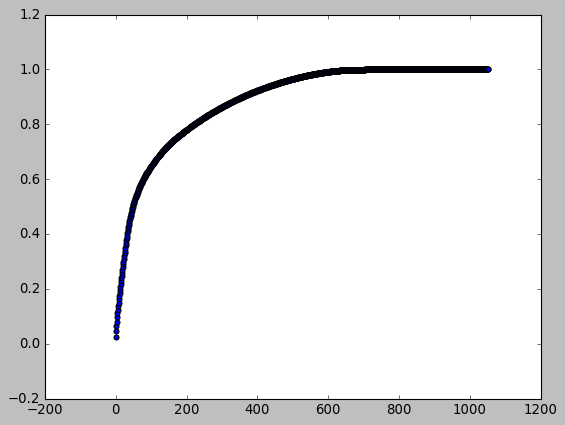

<IPython.core.display.Javascript object>

In [39]:
sum_importances = sum_and_plot(variables, importances)

#### 4.2.3 Aplicando um filtro para retirar as variáveis com menor importância


In [40]:
keep_vars = sum_importances[sum_importances.iloc[:, 1] <= 0.99].iloc[:, 0]

<IPython.core.display.Javascript object>

In [41]:
features_train_appentency = features_train[keep_vars]
features_train_appentency.shape

(50000, 592)

<IPython.core.display.Javascript object>

#### 4.2.4 Exportando o Dataset

In [50]:
features_train_appentency.to_csv("features_train_appentency.csv", index=False)

<IPython.core.display.Javascript object>

-----------------------------------------------

### 4.3 Upseling

<p>
    Por últimos iremos realizar com Upseling, e finalizar o tratamento e seleção da variáveis.
</p>

In [43]:
variables, importances = var_importances(features_train, upselling)

<IPython.core.display.Javascript object>

In [44]:
df_importances = pd.DataFrame({"variables": variables, "importances": importances})
df_importances

,variables,importances
0,Var211_L84s,0.022
1,Var211_Mtgm,0.021
2,Var153,0.016
3,Var28,0.016
4,Var57,0.015
...,...,...
1047,Var195_XMIgoIlPqx,0.000
1048,Var212_3vzwTT0wY25GE,0.000
1049,Var211_missing,0.000
1050,Var210_missing,0.000


<IPython.core.display.Javascript object>

#### 4.3.2 Visualizando a importância das variáveis

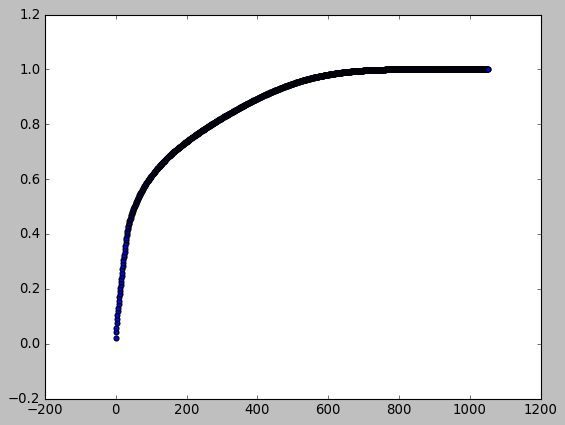

<IPython.core.display.Javascript object>

In [45]:
sum_importances = sum_and_plot(variables, importances)

#### 4.3.3 Aplicando um filtro para retirar as variáveis com menor importância

In [46]:
keep_vars = sum_importances[sum_importances.iloc[:, 1] <= 0.99].iloc[:, 0]

<IPython.core.display.Javascript object>

In [47]:
features_train_upselling = features_train[keep_vars]
features_train_upselling.shape

(50000, 646)

<IPython.core.display.Javascript object>

#### 4.3.4 Exportando o Dataset

In [49]:
features_train_upselling.to_csv("features_train_upselling.csv", index=False)

<IPython.core.display.Javascript object>

## Conclusões

<p>
    Os tratamentos necessários para a aplicação do modelo, foram concluidos com sucesso. Temos três <code>Datasets</code>, para cada uma das variáveis targets. Reforçando, todo o processo foi baseado apenas na natureza dos dados, já que os mesmos são mascarados para preservar os clientes.
</p>

<p>
    Finalmente iremos começar, nos próximos Notebooks, as previsões.
</p>